<h1><strong>Task B6: Building an ARIMA model</strong></h1>

In [114]:
import pandas as pd
import numpy as np
import yfinance as yf
import os
import matplotlib.pyplot as plt
import time
import statsmodels.api as sm
import warnings as warning
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

<strong>Loading dateframe and saving if not</strong>

In [115]:
save_local = True
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2020-01-01"
local_file = f'data/{ticker}_data.csv'

directory = os.path.dirname(local_file)

if save_local and not os.path.exists(directory):
    os.makedirs(directory)
if save_local and local_file and os.path.exists(local_file):
    df = pd.read_csv(local_file, index_col='Date', parse_dates=True)
else:
    df = yf.download(ticker, start=start_date, end=end_date)
    if save_local:
        df.to_csv(local_file)

df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393280,447610800


In [116]:
data_grouped_mouthly = df['Adj_Close'].resample('MS').sum()
data_grouped_mouthly.head(20)

Date
2010-01-01    119.028489
2010-02-01    113.917305
2010-03-01    154.974790
2010-04-01    159.066578
2010-05-01    151.680716
2010-06-01    173.274253
2010-07-01    161.474221
2010-08-01    166.757026
2010-09-01    173.445269
2010-10-01    190.598659
2010-11-01    197.346349
2010-12-01    213.311135
2011-01-01    204.109662
2011-02-01    201.240558
2011-03-01    241.046107
2011-04-01    205.337476
2011-05-01    216.471575
2011-06-01    219.677876
2011-07-01    224.532700
2011-08-01    261.351226
Freq: MS, Name: Adj_Close, dtype: float64

<Axes: xlabel='Date'>

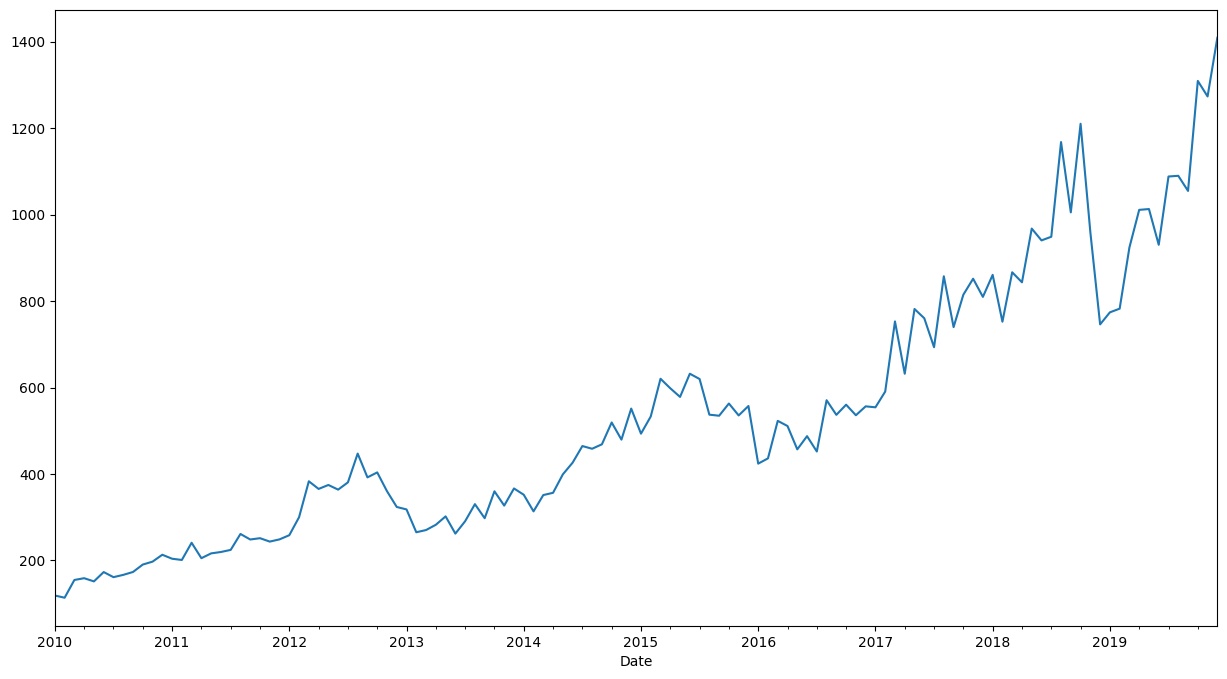

In [117]:
data_grouped_mouthly.plot(figsize=(15, 8))

<strong>Check for stainary dataframes (in this case its not)</strong>

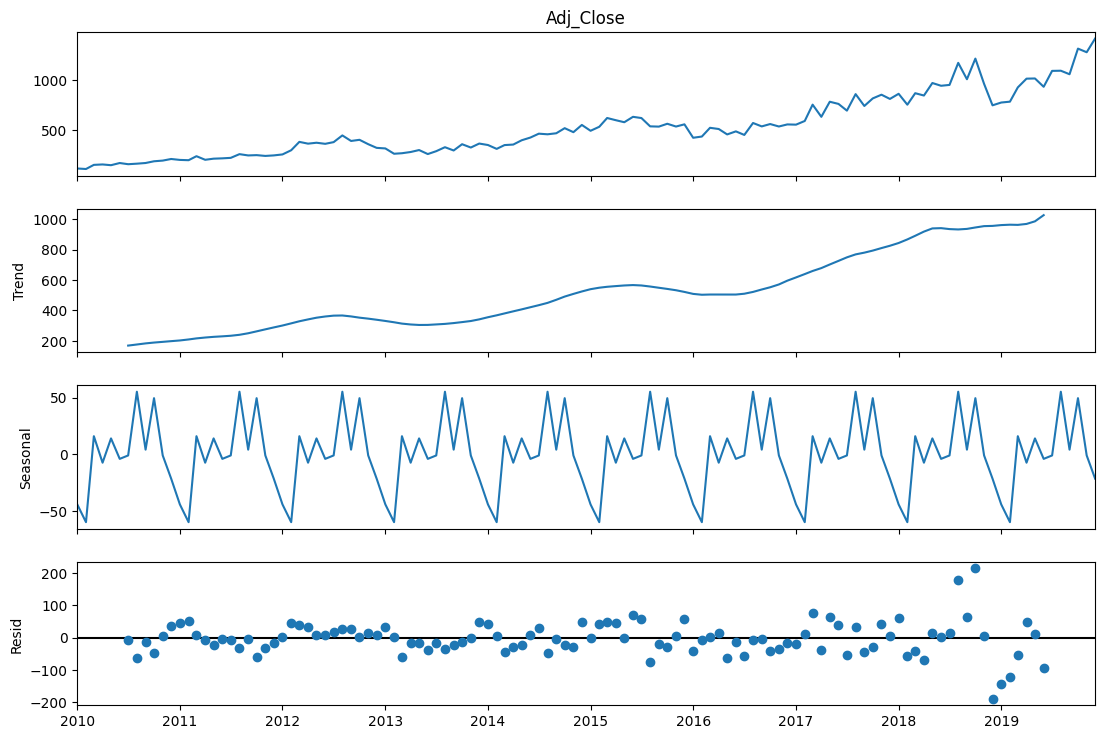

In [118]:
decomposition = sm.tsa.seasonal_decompose(data_grouped_mouthly, model="additive")
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

<strong>adfuller test - statistical proving that this is not stationary</strong>

In [119]:
adfuller_test = adfuller(data_grouped_mouthly)
print('P-value adfuller test: ', adfuller_test[1])

P-value adfuller test:  0.99750564160733


<strong>Train and test split</strong>

In [120]:
train = data_grouped_mouthly[:64]
test = data_grouped_mouthly[64:]

test.head(10)

Date
2015-05-01    578.318172
2015-06-01    631.952368
2015-07-01    619.732475
2015-08-01    537.272732
2015-09-01    534.796091
2015-10-01    563.055937
2015-11-01    535.484762
2015-12-01    557.319368
2016-01-01    424.033804
2016-02-01    436.189701
Freq: MS, Name: Adj_Close, dtype: float64

<strong>Building ARIMA model</strong>

In [140]:
model = ARIMA(train, order=(5, 0, 4)).fit()

In [141]:
prediction = model.predict(start=len(train), end=(len(data_grouped_mouthly) - 1))
prediction.head(20)

2015-05-01    648.624369
2015-06-01    612.743457
2015-07-01    624.314392
2015-08-01    623.149886
2015-09-01    616.257574
2015-10-01    623.357690
2015-11-01    604.017036
2015-12-01    634.544173
2016-01-01    590.538243
2016-02-01    627.262618
2016-03-01    609.148076
2016-04-01    593.576856
2016-05-01    630.655498
2016-06-01    583.564520
2016-07-01    616.580962
2016-08-01    599.899463
2016-09-01    598.099107
2016-10-01    603.017102
2016-11-01    594.804359
2016-12-01    602.705482
Freq: MS, Name: predicted_mean, dtype: float64

<strong>Model Evaluation</strong>

In [142]:
error = np.sqrt(mean_squared_error(test, prediction))
error

324.692666440412

<Axes: xlabel='Date'>

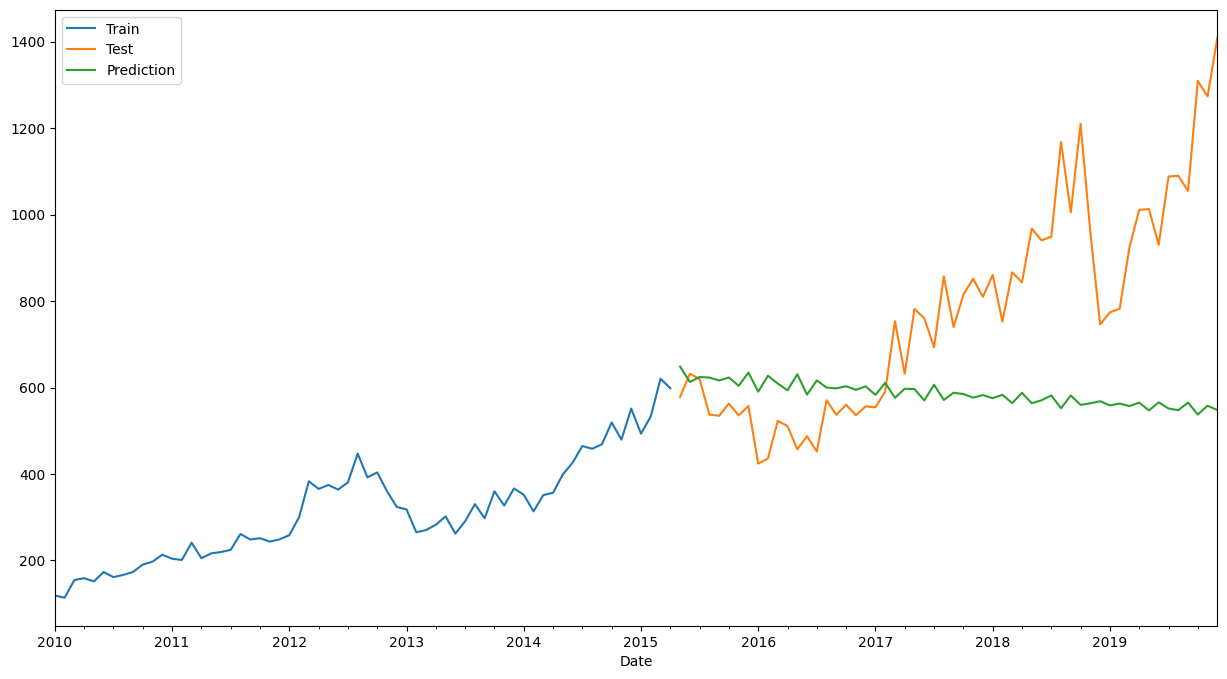

In [143]:
train.plot(legend=True, label="Train", figsize=(15, 8))
test.plot(legend=True, label="Test")
prediction.plot(legend=True, label="Prediction")

<Axes: xlabel='Date'>

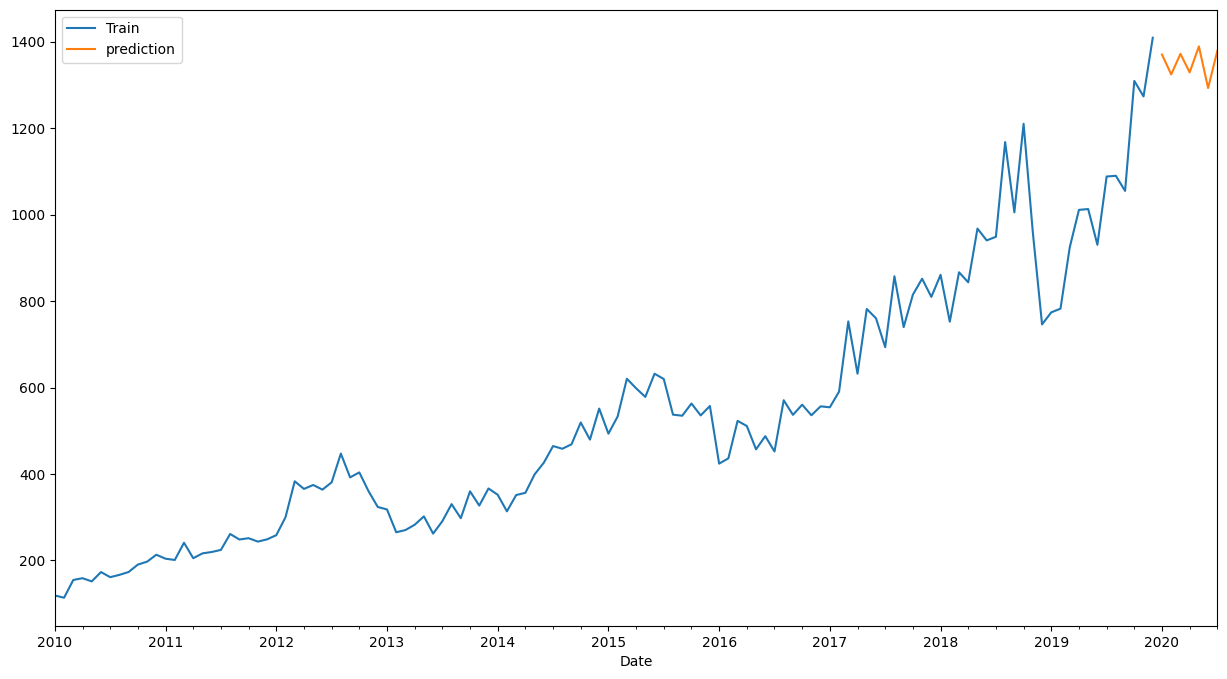

In [155]:
prediction_steps = 6
final_model = ARIMA(data_grouped_mouthly, order=(5, 0, 4)).fit()
final_prediction = final_model.predict(len(data_grouped_mouthly), len(data_grouped_mouthly) + prediction_steps)

data_grouped_mouthly.plot(legend=True, label="Train", figsize=(15, 8))
final_prediction.plot(legend=True, label="prediction")

<strong>ARIMA feture Predictions</strong>

In [156]:
final_prediction

2020-01-01    1370.037321
2020-02-01    1324.158128
2020-03-01    1371.732628
2020-04-01    1328.882205
2020-05-01    1388.919847
2020-06-01    1292.574698
2020-07-01    1378.780151
Freq: MS, Name: predicted_mean, dtype: float64